# Regression using ANNs and Vanilla (simple) DL Models

In this section, we have built **ANN Regression models** to **predict CO2 Emission** using:

- Machine learning Python library of **scikit-learn** and

- the deep learning Python libraries of **Tensorflow - Keras**. 

# I- How to design MLP Artificial Neural Network Model using scikit-learn Library

A **multilayer perceptron** (**MLP**) is a type of fully connected feedforward artificial neural network (ANN). It uses Backpropagation training method and the some versions of Stochastic Gradient Descent learning algorithm to learn the right values of weights and biases inorder to map inputs to their corresponding labels given in the training dataset. 
A MLP has inputs and output layer, and may has one or more hidden layers with many neurons in between inputs and the output layer.

**scikit-learn** is a free software machine learning library for the Python programming language. It provides various classification, regression and clustering algorithms and so many other data analysis and analitics tools. 

A **multilayer perceptron** (**MLP**) network is implemented in the **scikit-learn** Python library as two different classes:

- **MLPRegressor** **class** implements a multi-layer perceptron (MLP) that trains using backpropagation with **identity function as activation function (means no activation function)** in the output layer. It uses the **square error as the loss function**, and the output is a set of continuous values.

- **MLPClassifier** **class** implements a multi-layer perceptron (MLP) that trains using backpropagation. It uses the **Cross-Entropy loss function**, and the output is a set of continuous values. 
In the case of **binary classification tasks**, it uses **logistic activation function**. It outputs the values larger or equal to 0.5 are rounded to 1, otherwise to 0.
In the case of **multi-class classification**, it uses **Softmax activation** function. 

Scikit-learn implementations of MLP use **Stochastic Gradient Descent (SGD), Adam, or L-BFGS learning algorithms**. With SGD or Adam, training supports online and mini-batch learning.  ‘L-BFGS’, training does not support online nor mini-batch learning. Empirically, we observed that L-BFGS converges faster and with better solutions on small datasets. For relatively large datasets, however, Adam is very robust. It usually converges quickly and gives pretty good performance. SGD with momentum or nesterov’s momentum, on the other hand, can perform better than those two algorithms if learning rate is correctly tuned.



ALL ANN models including the Multi-layer Perceptron networks are **sensitive to feature scaling**, so it is highly recommended to scale your data. For example, scale each attribute on the input vector X to [0, 1] or [-1, +1], or standardize it to have mean 0 and variance 1. 


### Step 1 - Loading the required libraries and modules

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# conda install  TensorFlow
# The Official Keras Deep Neural Network Example for CNN 
###############################
# Setting Seed Random Number for Reproducibility
import numpy as np # linear algebra
np.random.seed(123)  # for reproducibility

# Setting Seed Random Number for the TensorFlow Backend
import tensorflow as tf
tf.random.set_seed(123) # for reproducibility

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
#%matplotlib inline

from tensorflow import keras
from keras import  backend as K

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Step 2 - Loading the data and performing basic data exploration

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("/kaggle/input/emmissiondata/CO2 Emissions_Canada.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


data = pd.read_csv("../input/california-housing-prices/housing.csv")
data.head()

In [4]:
# Shape of the dataset 
print (data.shape)
print(type(data)) # 'pandas.core.frame.DataFrame'


(7385, 12)
<class 'pandas.core.frame.DataFrame'>


In [5]:
# data type of the variables (columns)
print(data.dtypes)
# object means text data, float means decimal numerical data here.

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


In [6]:
# describe() function only list the numerical columns, and 
# display some statistical information about them.
data.describe() # display only numerical columns, add include='all' to display all columns

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [7]:
# check if there is a missing data
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

### Step 3 - Setting the input variable (inputs, features) and output variable (response variable).

In [8]:
# Identify your input variable (inputs)  (select the numerical columns for this level)
X = data[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)']]
# Display the first 3 rows of the inputs
X.head(3)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km)
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9


In [9]:
# Identify your output variable
# 'CO2 Emissions(g/km)'
y = data[['CO2 Emissions(g/km)']]
# Display the first 3 rows of the output
y.head(3)

,CO2 Emissions(g/km)
0,196
1,221
2,136


y = data[['median_house_value']]
y.head(5)

### Step 4 - Spliting the training and test datasets.

In [10]:
from sklearn.model_selection import train_test_split

# Step 1: Divide the input and output data (X, y) into the %20 test and %80 training using random state value of 1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=1)

### Step 5 - Scalling/Normalization of the input data

In [11]:
from sklearn.preprocessing import StandardScaler

# Scale the inputs using the StandardScaler
scaler = StandardScaler()
X_trainscaled=scaler.fit_transform(X_train)
X_testscaled=scaler.transform(X_test)

### Step 6 - Define, compile, and fit (train) the regression ANN model.

In [12]:
from sklearn.neural_network import MLPRegressor

# Step 2: Design an ANN model using 2 hidden layers with the numbers of 50 and 3 neurons, relu activation function, adam training method
net = MLPRegressor(hidden_layer_sizes=(50,3),
                   activation="relu",
                   solver="adam",
                   random_state=1, 
                   max_iter=500
                  )
net


MLPRegressor(hidden_layer_sizes=(50, 3), max_iter=500, random_state=1)

In [13]:
# Step 3: train your ANN model using the training data.
net.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(50, 3), max_iter=500, random_state=1)

### Step 7 - Display some properties of the trained neural network

The **coef_** attribute is implemented when the fit() method is called. Before that, it will be undefined.

In [14]:
# display the arhitecture of the neural network
for coef in net.coefs_:
    print(coef.shape)

(5, 50)
(50, 3)
(3, 1)


In [15]:
# # Step 4: display the learned weights
for layer, weights in enumerate(net.coefs_):
    print(f"Layer {layer + 1} weights:\n{weights}\n")

Layer 1 weights:
[[ 2.48283554e-165  2.85246303e-001 -3.86529823e-001 -2.92411191e-002
  -2.56250113e-001 -5.80698279e-002 -4.73672033e-005 -1.86125180e-001
  -1.99332566e-002  2.20915863e-001 -1.05743685e-003  3.91684584e-001
   1.11538969e-002  4.37420580e-001 -2.81471886e-002  3.17341684e-001
  -1.64692635e-002  2.68639979e-001 -4.08370523e-002  9.57687295e-136
  -1.09118803e-135  7.69006184e-002 -1.61847365e-002  2.35705729e-001
   1.74010422e-001  4.70454137e-001 -4.71076047e-002 -9.94738821e-002
   6.46541380e-132  2.72337961e-001 -3.82478989e-001 -1.08879364e-001
   5.37211986e-001 -1.22313012e-170  9.99010316e-002  7.37221565e-002
  -1.38809463e-001  4.08596444e-001 -1.30559711e-001  3.71141521e-001
  -7.01773514e-002  2.36119078e-001 -2.02711384e-002  2.41201824e-137
  -3.74073779e-002 -2.49825118e-168 -5.76770855e-122 -4.47738378e-149
   3.99803769e-002 -3.23212096e-002]
 [ 6.72957601e-114  2.98158646e-001 -2.31795130e-001 -3.91888182e-002
  -2.88364646e-002 -5.21605485e-002 

In [16]:
# Step 5: display the learned biases
for layer, biases in enumerate(net.intercepts_):
    print(f"Layer {layer + 1} biases:\n{biases}\n")

Layer 1 biases:
[-0.33002356  1.26124376  0.14183799  0.29650174  0.04529717  1.16219783
  0.02614999 -0.92629309  0.66309364  0.73657165  0.15960669  0.4820927
  0.93265396  0.79013283  0.19570133  0.5922481   0.0967646   0.78988153
  0.61981905 -0.05891608 -0.06508045 -0.13764517  0.0576414   0.01191377
  0.23751264  0.88022519  0.64234122  0.68760089 -0.10348207  0.17368262
  0.25028022  0.17705233  0.97186276 -0.15179543 -0.18775924  0.95961644
 -3.8844534   0.86281854  0.70147817  0.89602857 -3.98487875  1.78862562
  0.025396   -0.02265131  0.71730506 -0.28523152 -0.08064063 -0.27768987
  0.91552977  0.58206162]

Layer 2 biases:
[0.21843582 0.5634484  0.74973641]

Layer 3 biases:
[1.38240245]



* Displaying the some properties of the trained neural network

In [17]:
print('Activation function for hidden layers : {}'.format(net.activation))
# Hidden layer activation functions {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
# Activation function for the all hidden layers is the same
print('Output layer activation automatically set : {}'.format(net.out_activation_))
# MLPRegressor uses identity transfer function as output activation automatically. In the current version you can not set this parameter.
print('the input size automatically set : {}'.format(net.n_features_in_))
# MLPRegressor sets input size during the training by looking at the input variable automatically. In the current version you can not set this parameter.
print('Solver (training algorithm) : {}'.format(net.solver))
# solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
print('Alpha value : {}'.format(net.alpha))
print('Number of the training : {}'.format(net.n_iter_))

# MLPRegressor uses the Mean Square Error loss function. In the current version you can not set this parameter.



Activation function for hidden layers : relu
Output layer activation automatically set : identity
the input size automatically set : 5
Solver (training algorithm) : adam
Alpha value : 0.0001
Number of the training : 253


### Step 8 - Predict on the test data and estimate accuracy of the trained network.

In [18]:
# Step 6: Display the test accuracy of the ANN model using the test data
test_score = net.score(X_test, y_test)
print(f"The test accuracy (R^2 score) of the ANN model is: {test_score:.4f}")

The test accuracy (R^2 score) of the ANN model is: 0.9356


### Step 9 - Scoring: Making the prediction using the trained network 

In [19]:
# Step 7: Make a prediction and display for the following inputs [5.6,4,16,12,15]
input_data = np.array([[5.6, 4, 16, 12, 15]])
prediction = net.predict(input_data)
print(f"The predicted output is [5.6, 4, 16, 12, 15] is: {prediction[0]}")

The predicted output is [5.6, 4, 16, 12, 15] is: 259.9971378202153


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [20]:
# Using the trained network in the production environment to make the real time prediction
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
# Using interact() as a decorator
@interact(
    # Specifying the handler for the arguments in the function predict
    x1 = widgets.FloatSlider(min=3, max=8.1, step=0.1, value=3, description="Engine Size:"),
    x2 = widgets.FloatSlider(min=3, max=16, step=1, value=3, description="Cylinders:"),
    x3 = widgets.FloatSlider(min=4, max=31, step=0.1, value=4, description="Fuel Con City:"),
    x4 = widgets.FloatSlider(min=4, max=21, step=0.1, value=4, description="Fuel Con Hwy"),
    x5 = widgets.FloatSlider(min=4, max=26.5, step=0.1, value=4, description="Fuel Con (km):")
)

def predict(x1, x2, x3, x4, x5):
   
    # present new data
    new_input = [x1, x2, x3, x4, x5]
    # make a prediction
    yhat = net.predict([new_input])
    # summarize prediction
    print('If inputs are [%1.1f, %1.1f,%1.1f, %1.1f,%1.1f] predicted CO2 is : %d' % (x1,x2,x3,x4,x5,yhat))

interactive(children=(FloatSlider(value=3.0, description='Engine Size:', max=8.1, min=3.0), FloatSlider(value=…

# II - How to design ANN for regression tasks using the Tensorflow - Keras

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as pyplot
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.utils import to_categorical, plot_model


## Design (Implement) the Neural network 

**Keras** is an **open-source DL library** that provides a Python interface **for** **neural networks**. Keras acts as an interface for the TensorFlow library. 
Designed to develop **deep neural networks** fast, it focuses on being user-friendly, modular, and extensible.

Using **Keras library's dense layer** module, you can design the feedforward artificial neural networks.  

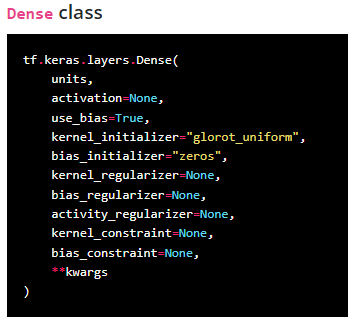

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation

# Step 8: Design an ANN model using 1 input layer, 2 hidden layers with the numbers of 500 and 10 neurons, relu activation function, 
# and output layer

n_input_variables = X.shape[1] # 5

model = Sequential()
model.add(Dense(500, input_dim=n_input_variables, activation='relu'))    # Input layer
model.add(Dense(500, activation='relu'))    # Hidden layer 1 (dense layer 1)
model.add(Dense(10, activation='relu'))    # Hidden layer 2 (dense layer 2)
model.add(Dense(3, activation='softmax'))    # Output layer   (dense layer 3)
    
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,543 (1009.93 KB)

 Trainable params: 258,543 (1009.93 KB)

 Non-trainable params: 0 (0.00 B)

## Train and Scoring the model
Keras library provides function for training, evaluation and prediction process. 

**compile** − Configure the model for training

**fit** − Train the model using the training data

**evaluate** − Evaluate the model using the test data

**predict** − Make prediction for new inputs.

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [24]:
history = model.fit(X_trainscaled,y_train,validation_data=(X_testscaled,y_test),
                    verbose=1,epochs=20)

Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66058.3203 - mse: 66058.3203 - val_loss: 66427.4922 - val_mse: 66427.4922
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 66

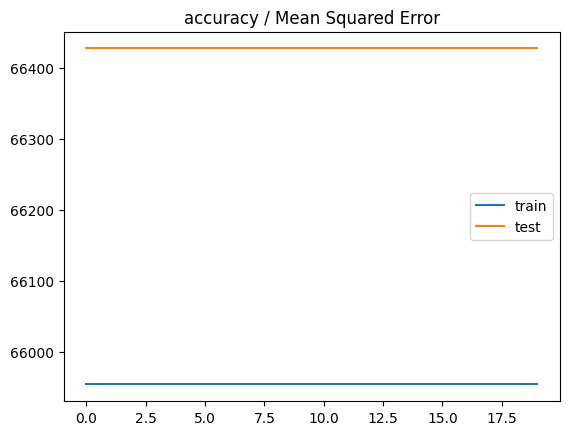

In [25]:
import matplotlib.pyplot as pyplot
# Visualize the training errors
pyplot.title('accuracy / Mean Squared Error')
pyplot.plot(history.history['mse'], label='train')
pyplot.plot(history.history['val_mse'], label='test')
pyplot.legend()
pyplot.show()

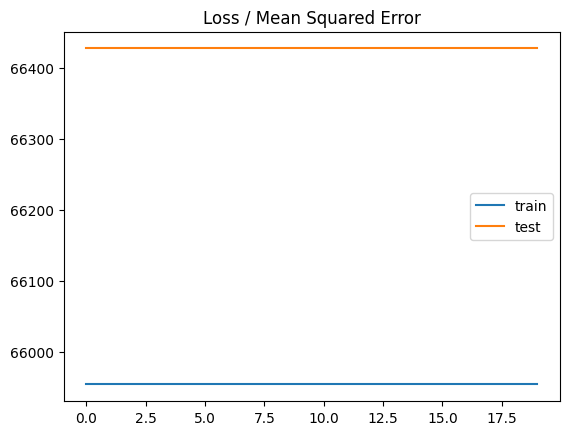

In [26]:
#Visualize the training loss function errors
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


<Axes: >

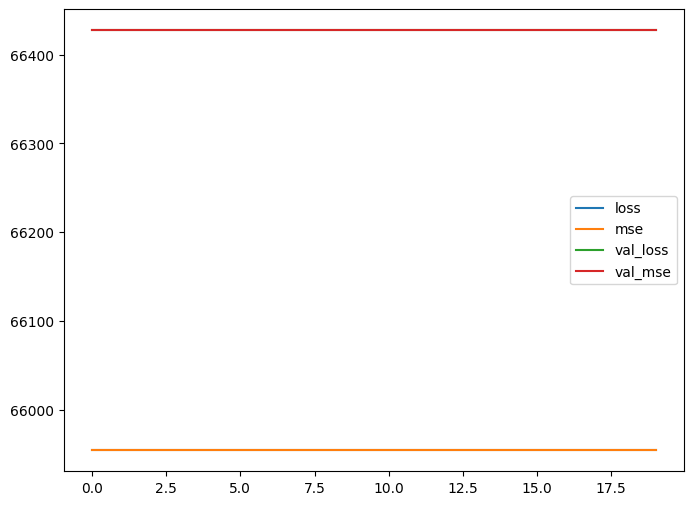

In [27]:
import pandas as pd # data processing

losses = pd.DataFrame(model.history.history)
losses.plot(figsize=(8,6))

In [28]:
# Step 9: Display the training accuracy of the ANN model using the training data
train_accuracy = history.history['mse'][-1]
print(f"Training Accuracy (MSE): {train_accuracy}")


Training Accuracy (MSE): 65954.390625


In [29]:
# Step 10: Display the test accuracy of the ANN model using the test data
test_loss, test_accuracy = model.evaluate(X_testscaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy (MSE): {test_accuracy}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67312.3750 - mse: 67312.3750
Test Loss: 66427.4921875
Test Accuracy (MSE): 66427.4921875


## Report the performance of the Network over the test dataset 

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = net.predict(X_test)  # Predict on the test set
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score:', metrics.explained_variance_score(y_test, y_pred))

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)






MAE: 6.587223275855666
MSE: 219.16095148296435
RMSE: 14.804085634815962
Variance score: 0.9365704153547869
Shape of y_test: (1477, 1)
Shape of y_pred: (1477,)


## Using the trained model in the production environment

In [31]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
# Using interact() as a decorator
@interact(
    # Specifying the handler for the arguments in the function predict
    x1 = widgets.FloatSlider(min=3, max=8.1, step=0.1, value=3, description="Engine Size      :"),
    x2 = widgets.FloatSlider(min=3, max=16, step=1, value=3, description="Cylinders:"),
    x3 = widgets.FloatSlider(min=4, max=31, step=0.1, value=4, description="Fuel Con City:"),
    x4 = widgets.FloatSlider(min=4, max=21, step=0.1, value=4, description="Fuel Con Hwy"),
    x5 = widgets.FloatSlider(min=4, max=26.5, step=0.1, value=4, description="Fuel Con (km):")
)

def predict(x1, x2, x3, x4, x5):
   
    # present new data
    new_input = np.array([x1, x2, x3, x4, x5])
    #Keras predict function expect the input data shape of (None, Number of the input variables)
    new_input = new_input.reshape(1, -1)  # Reshape to dimension from (1,) to (1, 5)
    # make a prediction
    yhat = model.predict([new_input])
    # summarize prediction
    print('If inputs are [%1.1f, %1.1f,%1.1f, %1.1f,%1.1f] predicted CO2 is : %d' % (x1,x2,x3,x4,x5,yhat))

interactive(children=(FloatSlider(value=3.0, description='Engine Size      :', max=8.1, min=3.0), FloatSlider(…

## Model Structure
Keras provides few methods to get the model information like layers, input data and output data. 

model.layers − Returns all the layers of the model as list.

model.inputs − Returns all the input tensors of the model as list.

model.outputs − Returns all the output tensors of the model as list.
model.get_weights − Returns all the weights as NumPy arrays.
model.set_weights(weight_numpy_array) − Set the weights of the model.

In [32]:
layers = model.layers 
print(layers) 

inputs = model.inputs 
print(inputs) 

outputs = model.outputs 
print(outputs) 

[<Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>, <Dense name=dense_3, built=True>]
[<KerasTensor shape=(None, 5), dtype=float32, sparse=None, name=keras_tensor>]
[<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_10>]


**model.get_weights()** − Returns all the weights as a list object.

In [33]:
print(model.get_weights())

[array([[-0.03393761,  0.00286862, -0.10075288, ..., -0.06812543,
        -0.0035827 , -0.03927949],
       [-0.08774026, -0.03626197,  0.09737302, ...,  0.03100601,
        -0.07992745, -0.09751282],
       [-0.06030788,  0.03318784,  0.0001549 , ...,  0.01426227,
        -0.02273367,  0.09932773],
       [-0.00521797, -0.03231176,  0.08386055, ..., -0.08103684,
        -0.01172996,  0.10532551],
       [ 0.07934786, -0.00698625,  0.08945593, ...,  0.09944409,
         0.09660389,  0.02266077]], dtype=float32), array([ 4.38216561e-03,  6.43130112e-03, -2.56318785e-03,  7.08705513e-03,
       -1.81730650e-03, -4.26637148e-03,  9.45047103e-03, -8.49427539e-04,
       -3.57245933e-03,  7.80165254e-04, -4.15948743e-04,  4.39638126e-04,
       -2.50157551e-03, -2.35143001e-03, -2.52702227e-03, -2.48005195e-03,
       -6.62244391e-03,  2.52739340e-03, -7.33239343e-03,  7.92437512e-03,
        8.96528549e-03,  8.01386050e-05,  1.12485897e-03, -7.27147516e-03,
       -8.73530004e-03,  4.21942

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)            │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,631 (2.96 MB)

 Trainable params: 258,543 (1009.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 517,088 (1.97 MB)

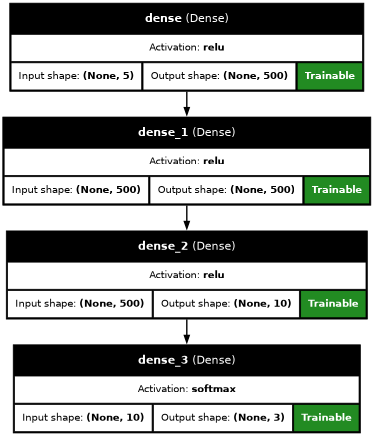

In [35]:
# Visualize Model
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True, 
           dpi=50, 
           show_layer_activations=True,
           show_trainable=True)